In [1]:
import pandas as pd
df=pd.read_csv("/content/ARP Poison,flood attack Dataset.csv")
print(df)


       switch_id  in_port     outport  src_mac_addr(eth)  src_mac_addr(arp)  \
0              5        1  4294967291  00:00:00:00:00:07  00:00:00:00:00:07   
1              2        3  4294967291  00:00:00:00:00:07  00:00:00:00:00:07   
2              4        4  4294967291  00:00:00:00:00:07  00:00:00:00:00:07   
3              3        4  4294967291  00:00:00:00:00:07  00:00:00:00:00:07   
4              1        1  4294967291  00:00:00:00:00:07  00:00:00:00:00:07   
...          ...      ...         ...                ...                ...   
34151          1        2           1  00:00:00:00:00:0e  00:00:00:00:00:0e   
34152          2        4           1  00:00:00:00:00:0e  00:00:00:00:00:0e   
34153          3        4           2  00:00:00:00:00:0e  00:00:00:00:00:0e   
34154          3        2           4  00:00:00:00:00:02  00:00:00:00:00:02   
34155          2        1           4     00:00:00:00:00                NaN   

       dst_mac_addr(eth)  dst_mac_addr(arp) src_ip(

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34156 entries, 0 to 34155
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   switch_id          34156 non-null  int64  
 1   in_port            34156 non-null  int64  
 2   outport            34156 non-null  int64  
 3   src_mac_addr(eth)  34156 non-null  object 
 4   src_mac_addr(arp)  33633 non-null  object 
 5   dst_mac_addr(eth)  34155 non-null  object 
 6   dst_mac_addr(arp)  33632 non-null  object 
 7   src_ip(arp)        34155 non-null  object 
 8   dst_ip(arp)        34155 non-null  object 
 9   op_code(arp)       34155 non-null  float64
 10  packet_in_count    34155 non-null  float64
 11  Protocol           34155 non-null  float64
 12  Pkt loss           34155 non-null  float64
 13  rtt (avg)          34155 non-null  float64
 14  total_time         34155 non-null  float64
 15  Label              34155 non-null  float64
dtypes: float64(7), int64(3

In [3]:
df.isnull().sum()

switch_id              0
in_port                0
outport                0
src_mac_addr(eth)      0
src_mac_addr(arp)    523
dst_mac_addr(eth)      1
dst_mac_addr(arp)    524
src_ip(arp)            1
dst_ip(arp)            1
op_code(arp)           1
packet_in_count        1
Protocol               1
Pkt loss               1
rtt (avg)              1
total_time             1
Label                  1
dtype: int64

In [4]:
df.dropna(inplace=True)
df.isnull().sum()

switch_id            0
in_port              0
outport              0
src_mac_addr(eth)    0
src_mac_addr(arp)    0
dst_mac_addr(eth)    0
dst_mac_addr(arp)    0
src_ip(arp)          0
dst_ip(arp)          0
op_code(arp)         0
packet_in_count      0
Protocol             0
Pkt loss             0
rtt (avg)            0
total_time           0
Label                0
dtype: int64

In [5]:
for i in df.columns:
  print(i,len(df[i].unique()))

switch_id 13
in_port 4
outport 5
src_mac_addr(eth) 25
src_mac_addr(arp) 25
dst_mac_addr(eth) 28
dst_mac_addr(arp) 27
src_ip(arp) 19
dst_ip(arp) 20
op_code(arp) 3
packet_in_count 15092
Protocol 2
Pkt loss 2
rtt (avg) 5
total_time 73
Label 2


In [6]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

columns=["outport","src_mac_addr(eth)",	"src_mac_addr(arp)","dst_mac_addr(eth)","dst_mac_addr(arp)","src_ip(arp)","dst_ip(arp)","total_time"]
for attr in columns:
    df[attr]= label_encoder.fit_transform(df[attr])

df

,switch_id,in_port,outport,src_mac_addr(eth),src_mac_addr(arp),dst_mac_addr(eth),dst_mac_addr(arp),src_ip(arp),dst_ip(arp),op_code(arp),packet_in_count,Protocol,Pkt loss,rtt (avg),total_time,Label
0,5,1,4,6,6,27,0,17,3,1.0,1707.0,0.0,0.0,0.0,10,0.0
1,2,3,4,6,6,27,0,17,3,1.0,1708.0,0.0,0.0,0.0,10,0.0
2,4,4,4,6,6,27,0,17,3,1.0,1709.0,0.0,0.0,0.0,10,0.0
3,3,4,4,6,6,27,0,17,3,1.0,1710.0,0.0,0.0,0.0,10,0.0
4,1,1,4,6,6,27,0,17,3,1.0,1711.0,0.0,0.0,0.0,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34150,6,2,3,12,12,1,2,4,9,2.0,20837.0,0.0,0.0,0.0,72,0.0
34151,1,2,0,12,12,1,2,4,9,2.0,20838.0,0.0,0.0,0.0,72,0.0
34152,2,4,0,12,12,1,2,4,9,2.0,20839.0,0.0,0.0,0.0,72,0.0
34153,3,4,1,12,12,1,2,4,9,2.0,20840.0,0.0,0.0,0.0,72,0.0


In [7]:
X=df.drop("Label",axis=1)
y=df["Label"]

print(X)
print(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

y_pred=knn.predict(X_test)
print(y_pred)

       switch_id  in_port  outport  src_mac_addr(eth)  src_mac_addr(arp)  \
0              5        1        4                  6                  6   
1              2        3        4                  6                  6   
2              4        4        4                  6                  6   
3              3        4        4                  6                  6   
4              1        1        4                  6                  6   
...          ...      ...      ...                ...                ...   
34150          6        2        3                 12                 12   
34151          1        2        0                 12                 12   
34152          2        4        0                 12                 12   
34153          3        4        1                 12                 12   
34154          3        2        3                  1                  1   

       dst_mac_addr(eth)  dst_mac_addr(arp)  src_ip(arp)  dst_ip(arp)  \
0             

In [8]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print("Classification report:\n",classification_report(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print("Confusion_Matrix:\n",cm)
accuracy=accuracy_score(y_test,y_pred)
print("\nAccuracy: ",accuracy)


Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5113
         1.0       1.00      1.00      1.00      1614

    accuracy                           1.00      6727
   macro avg       1.00      1.00      1.00      6727
weighted avg       1.00      1.00      1.00      6727

Confusion_Matrix:
 [[5113    0]
 [   0 1614]]

Accuracy:  1.0


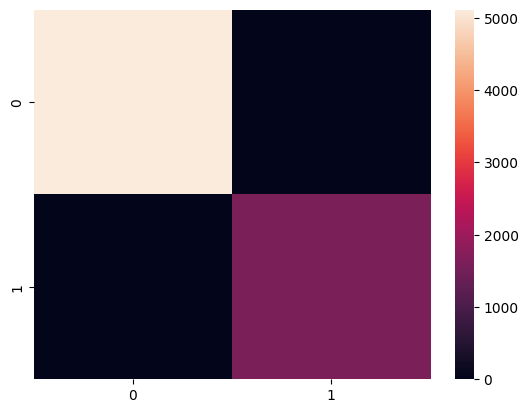

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm)
plt.show()